In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import sys
sys.path.append('drive/My Drive/class/北分署/week9/keras-yolo3')

In [3]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from train import yolo_body, get_anchors, create_model, get_classes
from yolo import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

Using TensorFlow backend.


In [4]:
classes_path = 'drive/My Drive/class/北分署/week9/keras-yolo3/model_data/aoi_classes.txt'
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = 'drive/My Drive/class/北分署/week9/keras-yolo3/model_data/yolo_anchors.txt'
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path='drive/My Drive/class/北分署/week9/keras-yolo3/ep084-loss22.021-val_loss21.299.h5', 
            classes_path=classes_path,
            anchors_path=anchors_path)













drive/My Drive/class/北分署/week9/keras-yolo3/ep084-loss22.021-val_loss21.299.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


drive/My Drive/class/北分署/week9/keras-yolo3/dataset/train_img/scratches_15.jpg
(200, 200) (416, 416)
(416, 416, 3)
Found 3 boxes for img
scratches 0.28 (126, 33) (138, 66)
scratches 0.31 (38, 34) (63, 127)
scratches 0.59 (122, 136) (131, 195)
1.6783867970000301


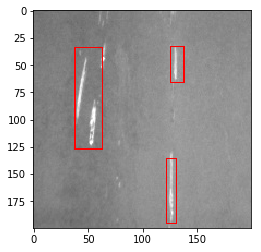

In [7]:
path = np.random.choice(glob('drive/My Drive/class/北分署/week9/keras-yolo3/dataset/train_img/*'), 1)[0]
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.imshow(r_image)

## Yolo pretrained COCO

In [8]:
classes_path = 'drive/My Drive/class/北分署/week9/keras-yolo3/model_data/coco_classes.txt'
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = 'drive/My Drive/class/北分署/week9/keras-yolo3/model_data/yolo_anchors.txt'
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path='drive/My Drive/class/北分署/week9/keras-yolo3/yolo_weights.h5', 
            classes_path=classes_path,
            anchors_path=anchors_path)

drive/My Drive/class/北分署/week9/keras-yolo3/yolo_weights.h5 model, anchors, and classes loaded.


drive/My Drive/class/北分署/week9/keras-yolo3/street.jpeg
(273, 185) (416, 416)
(416, 416, 3)
Found 11 boxes for img
car 0.21 (5, 101) (34, 111)
car 0.40 (75, 98) (88, 105)
car 0.50 (55, 98) (77, 106)
person 0.84 (157, 89) (175, 153)
person 0.95 (92, 124) (100, 152)
person 0.95 (83, 128) (91, 156)
person 0.98 (196, 110) (215, 172)
person 0.98 (174, 100) (201, 174)
person 0.98 (146, 106) (165, 169)
person 0.99 (115, 98) (139, 166)
person 0.99 (218, 112) (239, 171)
4.4682889660000455


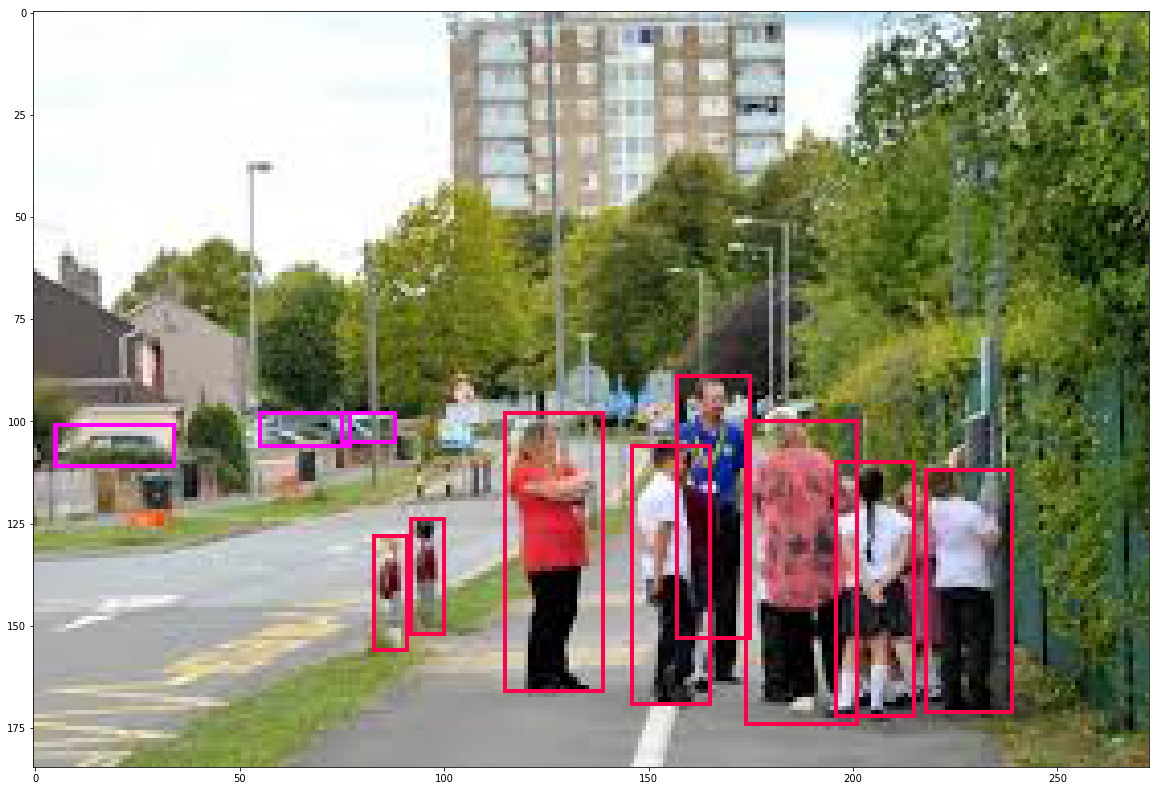

In [9]:
path = 'drive/My Drive/class/北分署/week9/keras-yolo3/street.jpeg'
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.figure(figsize=(20,20))
plt.imshow(r_image)